In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile 
from qiskit.visualization import * 
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
from qiskit_aer import QasmSimulator 
from qiskit.circuit.library import MCMT 
from math import sqrt, pow, pi 

In [5]:
#Create Diffuser circuit 
def diffuser(nqubits): 
    qc=QuantumCircuit(n) 
#diff=H^nR_oH^n 
    # Apply transformation |s> -> |00..0> (H-gates) 
    for qubit in range(nqubits): 
        qc.h(qubit) 
   #Start implementing the R_0  
    for qubit in range(nqubits): 
        qc.x(qubit) 
     
       # Do multi-controlled-Z gate using multicontrol multitarget gate MCMT 
    cnz = MCMT('z', num_ctrl_qubits=nqubits-1, num_target_qubits=1) 
    qc=qc.compose(cnz) #add cnz to the original qc 
     
    # Apply transformation |11..1> -> |00..0> 
    for qubit in range(nqubits): 
        qc.x(qubit) 
    # Apply transformation |00..0> -> |s> 
    #apply xzxz to the first qubit 
    qc.x(0) 
    qc.z(0) 
    qc.x(0) 
    qc.z(0) 
    # End of R_0 
     
    for qubit in range(nqubits): 
        qc.h(qubit) 
         
    # We will return the diffuser as a gate 
    U_s = qc.to_gate() 
    U_s.name = "U$_s$" 
    return U_s 
 
#Input the string size 
n=6 
#Create Oracle 
qc = QuantumCircuit(n+1) 
qc.cx(1,n)  
qc.cx(0,n) #String is equal to 110000 
#qc.cz(0, 3) 
oracle_exn = qc.to_gate() 
oracle_exn.name = "U$_\omega$" 
 
grover_circuit = QuantumCircuit(n+1,n) 
grover_circuit.x(n) #To create the Ancilla |-> 
for qubit in range(n+1): 
    grover_circuit.h(qubit) 
   
# Number of iterations of oracle and diffuser needed 
 
t=pi*sqrt(pow(pow(2,n),0.5))/4-0.5 
t=int(t) 
#grover_circuit = initialize(grover_circuit, [0,1,2]) 
for i in range(t): 
    grover_circuit=grover_circuit.compose(oracle_exn) 
    grover_circuit=grover_circuit.compose(diffuser(n)) 
 
for qubit in range(n): 
    grover_circuit.h(qubit) 

for i in range(n): 
    grover_circuit.measure(i,i) 
#grover_circuit.measure_all() 
grover_circuit.draw()

C:\Users\siddh\AppData\Local\Temp\ipykernel_42816\1444083141.py:13: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.mcmt.MCMT`` is deprecated as of Qiskit 1.4. It will be removed no earlier than 3 months after the release date. Use MCMTGate instead.
  cnz = MCMT('z', num_ctrl_qubits=nqubits-1, num_target_qubits=1)


┌───┐     ┌─────────────┐┌────────┐┌───┐┌─┐               
q_0: ┤ H ├─────┤0            ├┤0       ├┤ H ├┤M├───────────────
     ├───┤     │             ││        │├───┤└╥┘┌─┐            
q_1: ┤ H ├─────┤1            ├┤1       ├┤ H ├─╫─┤M├────────────
     ├───┤     │             ││        │├───┤ ║ └╥┘┌─┐         
q_2: ┤ H ├─────┤2            ├┤2       ├┤ H ├─╫──╫─┤M├─────────
     ├───┤     │             ││  U$_s$ │├───┤ ║  ║ └╥┘┌─┐      
q_3: ┤ H ├─────┤3 U$_\omega$ ├┤3       ├┤ H ├─╫──╫──╫─┤M├──────
     ├───┤     │             ││        │├───┤ ║  ║  ║ └╥┘┌─┐   
q_4: ┤ H ├─────┤4            ├┤4       ├┤ H ├─╫──╫──╫──╫─┤M├───
     ├───┤     │             ││        │├───┤ ║  ║  ║  ║ └╥┘┌─┐
q_5: ┤ H ├─────┤5            ├┤5       ├┤ H ├─╫──╫──╫──╫──╫─┤M├
     ├───┤┌───┐│             │└────────┘└───┘ ║  ║  ║  ║  ║ └╥┘
q_6: ┤ X ├┤ H ├┤6            ├────────────────╫──╫──╫──╫──╫──╫─
     └───┘└───┘└─────────────┘                ║  ║  ║  ║  ║  ║ 
c: 6/═════════════════════════════════════════╩══╩══╩══╩══╩══╩═
                                              0  1  2  3  4  5

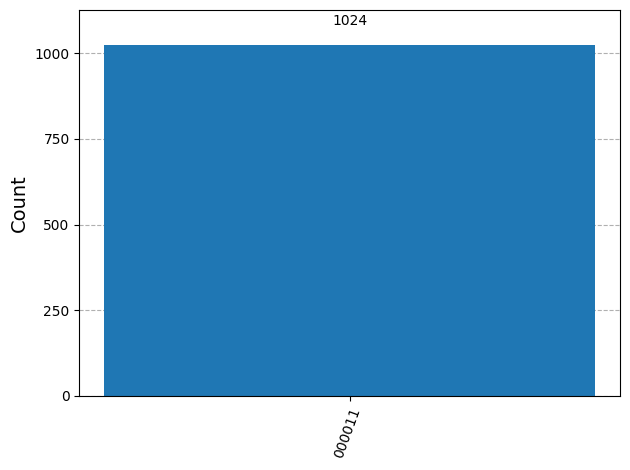

In [6]:
aer_sim = Aer.get_backend('aer_simulator') 
transpiled_grover_circuit = transpile(grover_circuit, aer_sim) 
# qobj = assemble(transpiled_grover_circuit) 
results = aer_sim.run(transpiled_grover_circuit).result() 
counts = results.get_counts() 
plot_histogram(counts)
